In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import learning_curve, validation_curve

In [2]:
def load_tic_toe_data(data_path='./data/tic-tac-toe/tic-tac-toe.data'):
    return pd.read_csv(data_path)

Experiment with decsion trees

In [3]:
tic_tac_toe_data = load_tic_toe_data()

In [4]:
for col_name in tic_tac_toe_data.columns:
#     print(tic_tac_toe_data[col_name].dtype)
    if(tic_tac_toe_data[col_name].dtype == 'object'):
        tic_tac_toe_data[col_name]= tic_tac_toe_data[col_name].astype('category')
        tic_tac_toe_data[col_name] = tic_tac_toe_data[col_name].cat.codes
tic_tac_toe_data.describe()
# tic_tac_toe_data.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,1.221526,1.132706,1.221526,1.132706,1.311390,1.133751,1.221526,1.133751,1.222571,0.653083
std,0.775566,0.798892,0.775566,0.798892,0.741201,0.799372,0.775566,0.799372,0.775941,0.476238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [5]:
# print(tic_tac_toe_data.iloc[:, np.r_[0:9]].head())
# print(tic_tac_toe_data.iloc[:, np.r_[9:10]].tail())
X = tic_tac_toe_data.iloc[:, np.r_[0:9]]
y = tic_tac_toe_data.iloc[:, np.r_[9:10]]

In [7]:
# tic_train_set, tic_test_set = train_test_split(tic_tac_toe_data, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')
# C_range = 10. ** np.arange(-3, 8)
# gamma_range = 10. ** np.arange(-5, 4)
n_range = range(1, 20, 1)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
param_grid = dict(max_depth=n_range, criterion=['gini', 'entropy'])
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=cv, n_jobs=-1)

grid.fit(X_train, y_train)

print("The best classifier is: ", grid.best_estimator_)

The best classifier is:  DecisionTreeClassifier(max_depth=12)


In [54]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

In [58]:
cv_score = cross_val_score(tree_clf, X_train, y_train, cv=10)
cv_score_mean = np.mean(cv_score)
cv_score_std = np.std(cv_score)
print(cv_score, cv_score_mean, cv_score_std)

[0.84615385 0.8125     0.828125   0.90625    0.796875   0.921875
 0.8125     0.90625    0.90625    0.84375   ] 0.8580528846153846 0.044918648986942276


In [59]:
train_accuracy = accuracy_score(y_train, tree_clf.predict(X_train))
test_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))
# train_precision = precision_score(y_train, tree_clf.predict(X_train))
# test_precision = precision_score(y_test, tree_clf.predict(X_test))
print(train_accuracy)
print(test_accuracy)
train_precision = precision_score(y_train, tree_clf.predict(X_train))
test_precision = precision_score(y_test, tree_clf.predict(X_test))
print(train_precision, test_precision)

train_f1 = f1_score(y_train, tree_clf.predict(X_train))
test_f1 = f1_score(y_test, tree_clf.predict(X_test))
print(train_f1, test_f1)
tree_clf.get_depth()
# print(train_precision, test_precision)

0.9719188767550702
0.8354430379746836
0.9781021897810219 0.8857142857142857
0.9781021897810219 0.8773584905660377


9

In [56]:
train_sizes, train_scores, test_scores = learning_curve(tree_clf, X_train, y_train, cv=10, random_state=42)


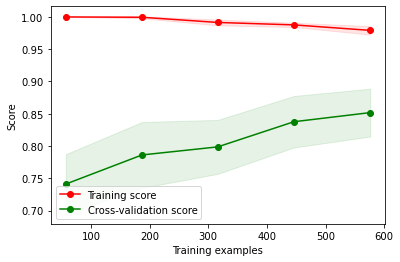

In [57]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

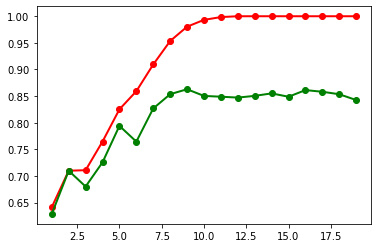

In [20]:
lw = 2
max_depth_range = range(1,20)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, param_name="max_depth", param_range=max_depth_range, scoring="accuracy", cv=20)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(max_depth_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_depth_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

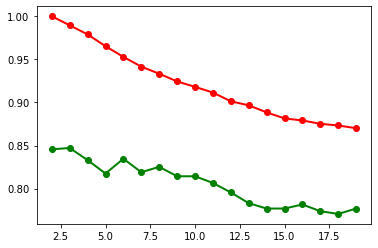

In [218]:
lw = 2
min_samples_split_range = range(2,20)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, param_name="min_samples_split", param_range=min_samples_split_range, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(min_samples_split_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(min_samples_split_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

In [36]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [37]:
mnist_X, mnist_y = mnist["data"], mnist["target"].astype(np.uint8)
print(mnist_X.shape, mnist_y.shape)

(70000, 784) (70000,)


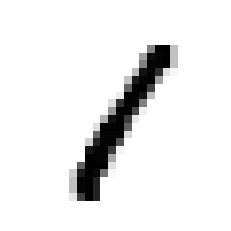

1


In [234]:
mnist_i = 3
some_digit = mnist_X[mnist_i]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()
print (mnist_y[mnist_i])

In [38]:
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y, test_size=.33, random_state=42)

In [39]:
mnist_tree_clf = DecisionTreeClassifier(random_state=42)
mnist_tree_clf.fit(mnist_X_train, mnist_y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')
# C_range = 10. ** np.arange(-3, 8)
# gamma_range = 10. ** np.arange(-5, 4)
n_range = range(1, 42, 1)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.33, random_state=42)
param_grid = dict(max_depth=n_range, criterion=['gini', 'entropy'])
grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_grid, cv=cv, n_jobs=-1, verbose=2)

grid.fit(mnist_X_train, mnist_y_train)

print("The best classifier is: ", grid.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   38.0s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   44.6s finished


The best classifier is:  DecisionTreeClassifier(criterion='entropy', max_depth=40)


In [61]:
mnist_tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=22, random_state=42)
mnist_tree_clf.fit(mnist_X_train, mnist_y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40, random_state=42)

In [62]:
cross_val_score(mnist_tree_clf, mnist_X_train, mnist_y_train, cv=3)

array([0.85896124, 0.86355786, 0.86714002])

In [63]:
mnist_tree_clf.get_depth()

21

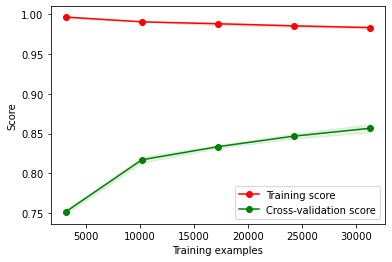

In [248]:
train_sizes, train_scores, test_scores = learning_curve(mnist_tree_clf, mnist_X_train, mnist_y_train, cv=3, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

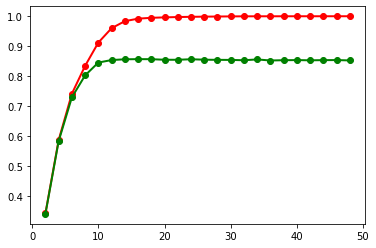

In [249]:
lw = 2
max_depth_range = range(2,50, 2)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), mnist_X_train, mnist_y_train, param_name="max_depth", param_range=max_depth_range, scoring="accuracy", cv=3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(max_depth_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_depth_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  57 | elapsed:   54.4s remaining:   52.5s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  1.5min finished


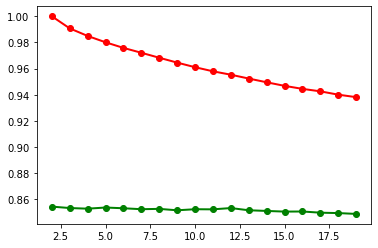

In [65]:
lw = 2
split_range = range(2,50, 2)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), mnist_X_train, mnist_y_train, param_name="min_samples_split", param_range=max_depth_range, scoring="accuracy", cv=3, n_jobs=-1, verbose=2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(max_depth_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_depth_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

In [70]:
train_accuracy = accuracy_score(mnist_y_train, mnist_tree_clf.predict(mnist_X_train))
test_accuracy = accuracy_score(mnist_y_test, mnist_tree_clf.predict(mnist_X_test))
# train_precision = precision_score(y_train, tree_clf.predict(X_train))
# test_precision = precision_score(y_test, tree_clf.predict(X_test))
print(train_accuracy)
print(test_accuracy)
train_precision = precision_score(mnist_y_train, mnist_tree_clf.predict(mnist_X_train), average='micro')
test_precision = precision_score(mnist_y_test, mnist_tree_clf.predict(mnist_X_test), average='micro')
print(train_precision, test_precision)

train_f1 = f1_score(mnist_y_train, mnist_tree_clf.predict(mnist_X_train), average='micro')
test_f1 = f1_score(mnist_y_test, mnist_tree_clf.predict(mnist_X_test), average='micro')
print(train_f1, test_f1)
mnist_tree_clf.get_depth()

1.0
0.8756277056277056
1.0 0.8756277056277056
1.0 0.8756277056277055


21